In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv("Alphabets_data.csv")

In [35]:
df.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [50]:
df=df.apply(pd.to_numeric,errors='ignore')

In [51]:
# Encode the target
label_encoder=LabelEncoder()
df['letter_encoded']=label_encoder.fit_transform(df['letter'])

In [52]:
# Features and target
X=df.drop(['letter','letter_encoded'],axis=1)

In [53]:
# Convert X to numeric explicitly 
X=X.apply(pd.to_numeric,errors='coerce')
if X.isnull().values.any():
    X.fillna(0,inplace=True)

In [54]:
y=to_categorical(df['letter_encoded'])

In [55]:
# Train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
# Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
# Model function
def create_model(input_dim,hidden_layers=1,neurons=64,activation='relu',output_dim=y.shape[1]):
    model=Sequential()
    model.add(Dense(neurons,input_dim=input_dim,activation=activation))
    for _ in range(hidden_layers-1):
        model.add(Dense(neurons,activation=activation))
    model.add(Dense(output_dim,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [58]:
# Build model
model=create_model(input_dim=X.shape[1])

In [59]:
# Train
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2637 - loss: 2.7216 - val_accuracy: 0.6491 - val_loss: 1.4240
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6825 - loss: 1.2497 - val_accuracy: 0.7391 - val_loss: 1.0089
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7476 - loss: 0.9368 - val_accuracy: 0.7713 - val_loss: 0.8437
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7762 - loss: 0.8026 - val_accuracy: 0.7959 - val_loss: 0.7363
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8122 - loss: 0.6847 - val_accuracy: 0.8150 - val_loss: 0.6619
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8255 - loss: 0.6179 - val_accuracy: 0.8288 - val_loss: 0.6076
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8390 - loss: 0.5730 - val_accuracy: 0.8403 - val_loss: 0.5643
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.5247 - val_accuracy: 0.

In [60]:
# Predict
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true_classes=np.argmax(y_test,axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
# Metrics
print("Accuracy:", accuracy_score(y_true_classes,y_pred_classes))
print("Precision:", precision_score(y_true_classes,y_pred_classes,average='macro'))
print("Recall:", recall_score(y_true_classes,y_pred_classes,average='macro'))
print("F1-score:", f1_score(y_true_classes,y_pred_classes,average='macro'))
print("\nClassification Report:\n", classification_report(y_true_classes,y_pred_classes))

Accuracy: 0.92625
Precision: 0.9256867601647076
Recall: 0.9256630259422867
F1-score: 0.9252769922112443

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       149
           1       0.87      0.90      0.89       153
           2       0.92      0.91      0.91       137
           3       0.94      0.86      0.90       156
           4       0.90      0.94      0.92       141
           5       0.89      0.94      0.91       140
           6       0.90      0.89      0.89       160
           7       0.79      0.81      0.80       144
           8       0.96      0.92      0.94       146
           9       0.94      0.91      0.92       149
          10       0.86      0.89      0.88       130
          11       0.96      0.95      0.96       155
          12       0.99      0.94      0.96       168
          13       0.92      0.91      0.92       151
          14       0.89      0.97      0.93       145
      

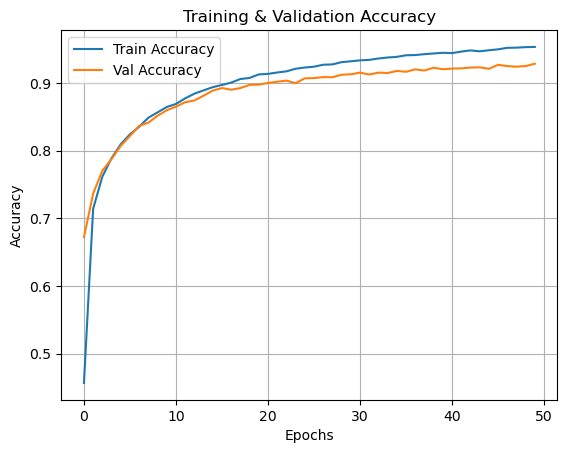

In [48]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()